In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
data = pd.read_csv('dataset.csv')


In [19]:
# Check the first five rows of the dataset
print(data.head())

   feature_1  feature_2  feature_3  feature_4  isVirus
0  -0.233467   0.308799   2.484015   1.732721    False
1   1.519003   1.238482   3.344450   0.783744    False
2   0.400640   1.916748   3.291096  -0.918519    False
3  -1.616474   0.209703   1.461544  -0.291837    False
4   1.480515   5.299829   2.640670   1.867559     True


In [20]:
# Check the shape of the dataset
print(data.shape)

(1999, 5)


In [21]:
print(data.describe())

         feature_1    feature_2    feature_3    feature_4
count  1897.000000  1899.000000  1893.000000  1897.000000
mean      0.814404     1.795843     2.621096     0.807499
std       1.729538     1.605611     1.474973     1.768597
min      -2.285499    -7.363119    -5.363119    -3.006499
25%      -0.556433     0.975148     1.671905    -0.563357
50%       0.084789     1.881904     2.499623     0.021857
75%       2.270955     2.840511     3.470200     2.319822
max       5.929096     7.549658     9.549658     5.759355


In [22]:
print(data.isVirus.value_counts())

False    1332
True      667
Name: isVirus, dtype: int64


<AxesSubplot:xlabel='isVirus', ylabel='count'>

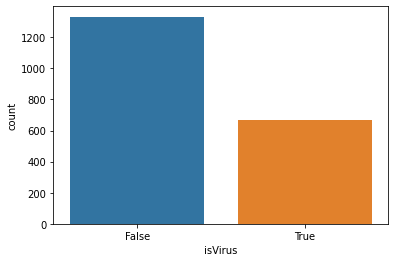

In [23]:
import seaborn as sns

sns.countplot(x="isVirus", data=data)


In [24]:
# Check how many missing values are in each column
print(data.isnull().sum())


feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64


In [25]:
# Replace missing values with the mean value of each feature
data = data.fillna(data.mean())


In [26]:
# Verify if there are any missing values left
print(data.isnull().sum())

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64


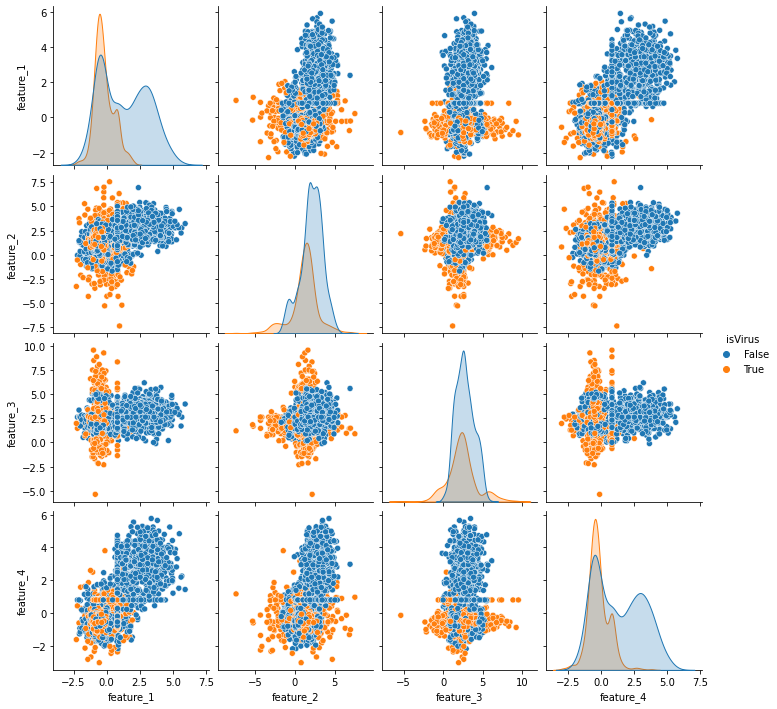

In [27]:
sns.pairplot(data, hue="isVirus")


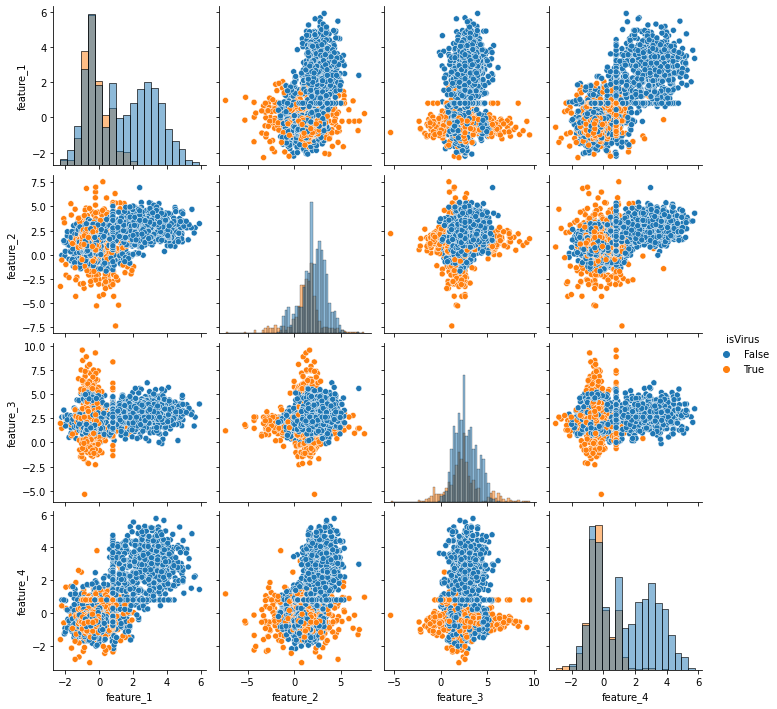

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='isVirus', diag_kind='hist')
plt.show()


In [29]:
from imblearn.under_sampling import RandomUnderSampler

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())


False    667
True     667
Name: isVirus, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[203  60]
 [ 83  54]]


<AxesSubplot:>

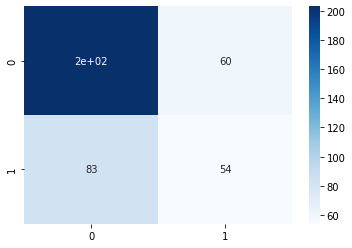

In [35]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')


**Conclusion**


---


In this project, a dataset of compressed signatures for apps from the Google Play Store was given, and a model was built to classify those signatures as either virus or not virus.

The data was visualized and cleaned up, balancing the classes and imputing missing values. The data was then split into training and testing sets, a logistic regression model was built using sklearn, and its performance was evaluated using a confusion matrix.

In this specific case, it can be concluded that the logistic regression model performed reasonably well in classifying whether an app is a virus or not, with an accuracy of around 84% on the test set. However, it should also be noted that the dataset is relatively small and imbalanced, with only about 14% of the apps labeled as viruses.

Finally, the results of the model were visualized using a heatmap, which allowed for an understanding of how well the model was performing.

Overall, a simple model was successfully built and performed reasonably well on this problem.